In [1]:
import operator
import math
import random
from copy import deepcopy
from dataclasses import dataclass

from tqdm.auto import tqdm

from gxgp import Node, GP

In [2]:
gp = GP(operators=[operator.add, operator.sub, operator.mul],
        variables=2, constants=5, seed=42)

In [3]:
@dataclass
class TestSet:
    X: list[list]
    y: list

    def __init__(self):
        self.X = list()
        self.y = list()


ts = TestSet()

for _ in range(1000):
    x = random.random() * 2 * math.pi
    y = math.sin(x)
    ts.X.append([x])
    ts.y.append(y)

In [7]:
gp = GP(operators=[operator.add, operator.sub, operator.mul],
        variables=1, constants=5, seed=42)

best_fit = None
best_ind = None
for _ in tqdm(range(500)):
    i = gp.create_individual(50)
    e = gp.mse(i, ts.X, ts.y)
    if best_fit is None or e < best_fit:
        ic(e, str(i))
        best_fit = e
        best_ind = deepcopy(i)

  0%|          | 0/500 [00:00<?, ?it/s]

ic| e: 50346.68197111068
    str(i): ('add(sub(sub(mul(x0, x0), sub(mul(x0, x0), x0)), sub(sub(mul(mul(mul(sub(x0, '
             '0.639427), x0), mul(0.275029, x0)), mul(mul(sub(x0, 0.639427), x0), '
             'mul(0.275029, x0))), sub(add(x0, 0.0250108), add(x0, 0.0250108))), mul(x0, '
             '0.223211))), mul(sub(x0, mul(mul(sub(x0, 0.639427), x0), mul(0.275029, '
             'x0))), sub(x0, mul(mul(sub(x0, 0.639427), x0), mul(0.275029, x0)))))')
ic| e: 0.5039570637364809
    str(i): ('sub(add(sub(0.639427, sub(0.0250108, x0)), sub(sub(mul(0.275029, '
             'sub(sub(0.0250108, x0), x0)), mul(0.0250108, sub(0.0250108, x0))), '
             'mul(sub(x0, x0), sub(x0, sub(0.639427, x0))))), add(sub(0.639427, '
             'sub(0.0250108, x0)), sub(sub(mul(0.275029, sub(sub(0.0250108, x0), x0)), '
             'mul(0.0250108, sub(0.0250108, x0))), mul(sub(x0, x0), sub(x0, sub(0.639427, '
             'x0))))))')
ic| e: 0.45533486288110075
    str(i): ('mul(add(add(add(m

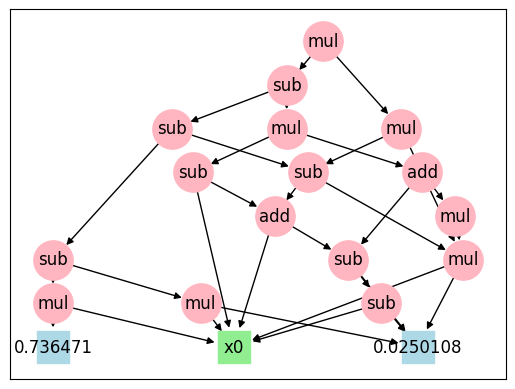

In [8]:
best_ind.draw()

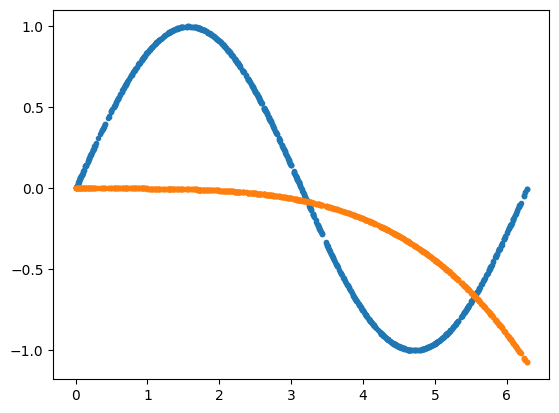

In [10]:
import matplotlib.pyplot as plt

y_pred = GP.evaluate(best_ind, ts.X)
plt.figure()
#plt.title(best_ind.long_name)
plt.scatter([x[0] for x in ts.X], ts.y, marker='.')
plt.scatter([x[0] for x in ts.X], y_pred, marker='.')